### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
#Exercise 1

import numpy as np


m = np.arange(12).reshape((3,4))
print(m,'\n')


# See comment at the end of exercise.

row_mean = m.mean(axis = 1) 
column_mean = m.mean(axis = 0)

print('Row means are: ', row_mean)
print('Column means are: ', column_mean)

overall_mean = m.flatten().mean()

print('Overall mean is: ', overall_mean)

# This could confuse you (me) because axis 1 is actually the columns. 
# The reason why a mean on axis 1 is actually the mean of the rows is that we 
# "lock in" on a row and we do things ALONG each column (axis 1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

Row means are:  [1.5 5.5 9.5]
Column means are:  [4. 5. 6. 7.]
Overall mean is:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
#Exercise 2

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])


#Outer function
uXv = np.outer(u,v)
print(uXv,'\n')


#List comprehension
uXv_listcomp = np.array([[u[i]*v[j] for j in range(4)]for i in range(4)])
print(uXv_listcomp,'\n')


#Broadcasting operations
# We go from 'u' being a single line, to a (4,1) matrix by using newaxis command, 
#so now we have a (4,1) and a (1,4) (thanks to broadcasting). 

uXv_broad = u[:,np.newaxis] * v

print(uXv_broad)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
#Exercise 3

a = np.random.uniform(0,1,(10,6))
print(a,'\n')
b = a.copy() #Make a copy so that I can use 'a' also for the other solution

#First solution that came to mind:

for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        if  b[i,j] < 0.1: 
            b[i] = 0
print(b,'\n')


#Solution using np.any:

for i in range(0,10):
    if np.any(a[i,:]<0.1):
        a[i,:]=0
print(a)

[[0.18025493 0.92323134 0.38775544 0.05544047 0.47124577 0.89269489]
 [0.53907112 0.53875308 0.86455406 0.47024617 0.87788444 0.33199766]
 [0.37431853 0.54296839 0.27207141 0.78650584 0.16999032 0.76303889]
 [0.51068601 0.75610105 0.18836745 0.16278622 0.7500637  0.69078498]
 [0.06782709 0.71740076 0.44250982 0.2947183  0.07391077 0.54152054]
 [0.09767562 0.14557824 0.94794296 0.80781163 0.49678442 0.05795014]
 [0.55150341 0.82662088 0.94796849 0.9477571  0.45409859 0.32524094]
 [0.74662423 0.91689552 0.08531015 0.45763866 0.48434661 0.26821832]
 [0.09316878 0.20310769 0.98613809 0.65469294 0.05362364 0.20560416]
 [0.11513586 0.32734571 0.67052767 0.41583228 0.06624732 0.13192094]] 

[[0.         0.         0.         0.         0.         0.        ]
 [0.53907112 0.53875308 0.86455406 0.47024617 0.87788444 0.33199766]
 [0.37431853 0.54296839 0.27207141 0.78650584 0.16999032 0.76303889]
 [0.51068601 0.75610105 0.18836745 0.16278622 0.7500637  0.69078498]
 [0.         0.         0.     

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Regular matrix: 
  [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 

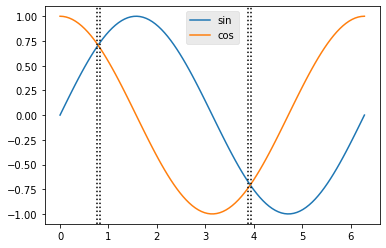

In [4]:
#Exercise 4

import matplotlib
import matplotlib.pyplot as plt

a = np.linspace(0,2*np.pi,100)
print('Regular matrix: \n ', a,'\n')

#Extract every 10th element
print('Every 10th element: \n', a[9::10],'\n')

#Reverse array
print('Reversed array: \n', a[::-1], '\n')

#Extract elements where the absolute difference between sin and cos...
# I converted list to array at the end just because it fit into the vibe of the exercises
b = np.array([i for i in a if np.abs(np.sin(i)-np.cos(i))<0.1])
print('Values for which the difference between sin and cos is less than 0.1 are: \n', b)


#Plot
plt.plot(a,np.sin(a),label='sin')
plt.plot(a,np.cos(a),label='cos')
for x_c in b:
    plt.axvline(x=x_c,color='black',linestyle='dotted')
matplotlib.style.use('ggplot')
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
#Exercise 5

a = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)

print(a)

print('Trace of matrix is: ', np.trace(a))
anti_d =  np.array(np.diag(np.fliplr(a)))
print('Antidiagonal is: ', anti_d)
offset_d = np.array(np.diag(a, k=1))
print('Offset diagonal is: ', offset_d)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace of matrix is:  385
Antidiagonal is:  [10 18 24 28 30 30 28 24 18 10]
Offset diagonal is:  [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
#Exercise 6

#Without broadcasting, next cell is WITH broadcasting

cities = ['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles']
miles_from_origin = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

dist = []
for j in miles_from_origin:
    for i in miles_from_origin:
        dist.append(abs(j-i))
        
grid_route_66 = np.array(dist).reshape(len(miles_from_origin),len(miles_from_origin))

print('2d grid of distances in miles is: \n', grid_route_66,'\n')

print('2d grid of distances in km is: \n', np.round(grid_route_66* 1.60934,2),'\n')

2d grid of distances in miles is: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

2d grid of distances in km is: 
 [[   0.    318.65  487.63 1184.47 1401.74 1890.97 2373.78 2484.82 3078.67
  3939.66]
 [ 318.65    0.    168.98  865.82 1083.09 1572.33 2055.13 2166.17 2760.02
  3621.02]
 [ 487.63  168.98    0.    696.84  914.11 1403.34 1886.15 1997.19 2591.04
  3452.03]
 [1184.47  865.82  696.84    0.    217.26  706.5  1189.3  1300.35 1894.19
  2755.19]
 [1401.74 1083.09  914.11  217.26    0.    489.24  972.04 

In [7]:
#Exercise 6

#With broadcasting

cities = ['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles']
miles_from_origin = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

miles_from_origin_row = miles_from_origin[np.newaxis, :]

miles_from_origin_column = miles_from_origin[:, np.newaxis] 

        
grid_route_66 = abs(miles_from_origin_row - miles_from_origin_column)

print('2d grid of distances in miles is: \n', grid_route_66,'\n')

print('2d grid of distances in km is: \n', np.round(grid_route_66* 1.60934,2),'\n')

2d grid of distances in miles is: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

2d grid of distances in km is: 
 [[   0.    318.65  487.63 1184.47 1401.74 1890.97 2373.78 2484.82 3078.67
  3939.66]
 [ 318.65    0.    168.98  865.82 1083.09 1572.33 2055.13 2166.17 2760.02
  3621.02]
 [ 487.63  168.98    0.    696.84  914.11 1403.34 1886.15 1997.19 2591.04
  3452.03]
 [1184.47  865.82  696.84    0.    217.26  706.5  1189.3  1300.35 1894.19
  2755.19]
 [1401.74 1083.09  914.11  217.26    0.    489.24  972.04 

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

Prime numbers (0-99) are with homemade method: [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
Prime numbers (0-99) are with sieve of Eratosthenes: [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


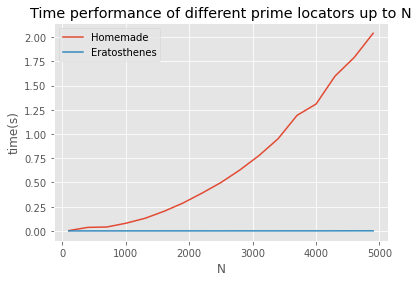

In [8]:
#Exercise 7

import time #Doubts regarding the accuracy of time library...



def primes(N):
    t_0 = time.time()
    num = np.arange(N)
    mask = np.array(num, dtype = bool)
    mask[:2] = 0
    for i in range(0,N):
        for j in range(2,(i//2)+1):
            if (num[i] % j == 0 ):
                mask[i]=False
    t_f = time.time()
    return num[mask], t_f-t_0


def era(N):
    t_0 = time.time()
    num = np.arange(N)
    mask = np.array(num, dtype = bool)
    mask[:2] = 0
    for i in range(2,int(np.sqrt(N))+1):
        if mask[i] == True: 
            for j in range(i**2, N, i): 
                mask[j] = False
    t_f = time.time()
    return num[mask], t_f-t_0

print('Prime numbers (0-99) are with homemade method:',primes(100)[0])
print('Prime numbers (0-99) are with sieve of Eratosthenes:', era(100)[0])


ex_time_homemade = []
for i in range(100,5000,300):
    ex_time_homemade.append(primes(i)[1])

ex_time_era = []
for i in range(100,5000,300):
    ex_time_era.append(era(i)[1])


n_array = np.array([j for j in range(100,5000,300)])


fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('N')
ax1.set_ylabel('time(s)')
ax1.set_title('Time performance of different prime locators up to N')
plt.plot(n_array, ex_time_homemade,label='Homemade')
plt.plot(n_array, ex_time_era, label = 'Eratosthenes')
plt.legend()
plt.show()


**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

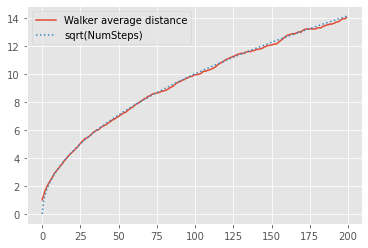

Result is consistent with the theory of random walks in 1D.
 Avg_distance goes like sqrt(NumSteps)


In [9]:
#Exercise 8

w = 1000
num_step = 200

a = np.random.choice([-1,1],size=(w, num_step))
#Each walker is a row so we calculate how much he moved from the starting position by summing
#on the row, we want to use 'cumsum' not sum (this way we know step by step how much each walker has walked)

#Remember from exercise 1 the trickyness of axis 0 and axis 1.


#Cumulative distance of walker(row)
#-->We look at each row and do "things" on all its columns (axis 1)
step_dist = np.cumsum(a, axis = 1)
square_step_dist = step_dist**2

#Mean square distance of all the walkers at each step
#--> we look at each column and do things on all its rows (axis 0)
meansquare = np.mean(square_step_dist, axis = 0)
avg_dist = np.sqrt(meansquare) #root mean square, aka 'standard deviation'

plt.plot(np.arange(num_step),avg_dist, label = 'Walker average distance')
plt.plot(np.arange(num_step), np.sqrt(np.arange(num_step)), label = 'sqrt(NumSteps)',linestyle = 'dotted')
matplotlib.style.use('ggplot')
plt.legend()
plt.show()

print('Result is consistent with the theory of random walks in 1D.\n Avg_distance goes like sqrt(NumSteps)')

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

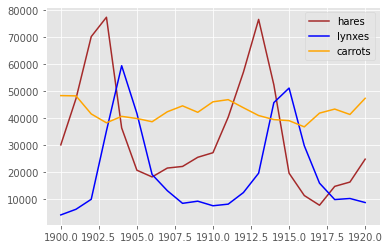

In [10]:
#Exercise 9

a = np.loadtxt("./populations.txt").astype('int')
year = np.array(a[:,0])
hares = np.array(a[:,1])
lynxes = np.array(a[:,2])
carrots = np.array(a[:,3])

plt.plot(year, hares, color = 'brown', label = 'hares')
plt.plot(year, lynxes, color = 'blue', label = 'lynxes')
plt.plot(year, carrots, color = 'orange', label = 'carrots')
matplotlib.style.use('ggplot')
plt.legend()
plt.show()

In [11]:
#Exercise 9

#statistical properties

pop_matrix = np.delete(a,0,axis = 1) #We drop the year column
mean = np.mean(pop_matrix,axis = 0)
std = np.std(pop_matrix, axis = 0)
#We use np.round to approximate to nearest integer --> You can't have HALF a hare (not while it's alive)
print('Mean population of hares, lynxes, and carrots respectively: ', np.round(mean, 0), '\n')
print('Standard deviation in population of hares, lynxes, and carrots respectively: ', np.round(std, 0), '\n')

print('The correlation matrix between the populations (entry 0 is Hares, entry 1 is Lynxes, entry 2 is Carrots) is:\n', np.corrcoef([hares,lynxes,carrots]),'\n')





#Max population each year: we loop over the rows and get the maximum
#max_val = np.amax(pop_matrix, axis = 1)
#print(max_val)                ---> This is fine but i don't know the correspondence max_pop <-> type_of_pop

#So my next idea is kind of "brute force"

print('Highest population each year: ','(in a numpy array format because of the vibe of these exercises)')
max_pop = []
for i in range(len(year)):
    if hares[i] > lynxes[i] and hares[i] > carrots[i]: 
        max_pop.append('Hares')
    elif lynxes[i] > hares[i] and lynxes[i] > carrots[i]: 
        max_pop.append('Lynxes')
    else:
        max_pop.append('Carrots')
        
print(np.column_stack((year,np.array(max_pop))))

Mean population of hares, lynxes, and carrots respectively:  [34081. 20167. 42400.] 

Standard deviation in population of hares, lynxes, and carrots respectively:  [20898. 16255.  3323.] 

The correlation matrix between the populations (entry 0 is Hares, entry 1 is Lynxes, entry 2 is Carrots) is:
 [[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]] 

Highest population each year:  (in a numpy array format because of the vibe of these exercises)
[['1900' 'Carrots']
 ['1901' 'Carrots']
 ['1902' 'Hares']
 ['1903' 'Hares']
 ['1904' 'Lynxes']
 ['1905' 'Lynxes']
 ['1906' 'Carrots']
 ['1907' 'Carrots']
 ['1908' 'Carrots']
 ['1909' 'Carrots']
 ['1910' 'Carrots']
 ['1911' 'Carrots']
 ['1912' 'Hares']
 ['1913' 'Hares']
 ['1914' 'Hares']
 ['1915' 'Lynxes']
 ['1916' 'Carrots']
 ['1917' 'Carrots']
 ['1918' 'Carrots']
 ['1919' 'Carrots']
 ['1920' 'Carrots']]
